In [1]:
import pyiron
import ase.calculators.emt
import ase.optimize
import ase.neb
import ase.visualize
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import ase.build

In [2]:
pr = pyiron.Project('surface_H')

In [3]:
# surface = pr.create.structure.surface('Fe', surface_type='bcc100',size=(3,3,12), vacuum=20)
# surface.center()
# surface.plot3d()

In [4]:
# surface = pr.create.structure.surface?
# len(surface)

In [5]:
bulk = pr.create.structure.bulk('Fe', cubic=True)
job = pr.create.job.Lammps('bulk', delete_existing_job=True)
job.structure = bulk
job.potential = job.list_potentials()[-1]
job.calc_minimize(pressure=0.0)
job.run(delete_existing_job=True)

The job bulk was saved and received the ID: 10837


In [6]:
bulk = job.get_structure(-1)

In [7]:
surface = pr.create.structure.surface_hkl(bulk, [0,0,1], 6, 20).repeat([3,3,1])
surface.center()
surface.plot3d()

NGLWidget()

In [8]:
H = pr.create.structure.atoms(['H','H'], positions=[(6.367338450271957, 6.367338450271957, 2.83/2*11+10),
                                                    (3.537410250151087, 3.537410250151087, 2.83/2*11+10)], cell=surface.get_cell())
surface += H
surface.plot3d()

NGLWidget()

In [9]:
job = pr.create.job.Lammps('surface_relax', delete_existing_job=True)
job.structure = surface
job.potential = job.list_potentials()[-1]
job.calc_minimize()
job.run(delete_existing_job=True)

The job surface_relax was saved and received the ID: 10838


In [10]:
job.animate_structures()

NGLWidget(max_frame=1)

In [11]:
surface = job.get_structure(-1)

In [12]:
H1 = surface[-1]
H1

Atom('H', [3.6562562598562107, 3.656256259808139, 25.94438196217348], magmom=0.0, index=-1)

In [13]:
H2 = surface[-2]
H2

Atom('H', [6.248492440565555, 6.2484924405573405, 25.94438196217348], magmom=0.0, index=-2)

In [14]:
h1 = np.array((H1.x, H1.y, H1.z))
h2 = np.array((H2.x, H2.y, H2.z))

In [15]:
h1

array([ 3.65625626,  3.65625626, 25.94438196])

In [16]:
distance = np.linalg.norm(h1 - h2)
distance

3.6659755636615716

In [17]:
np.sqrt(2) * 2.83

4.00222438151586

In [18]:
H2 = ase.build.molecule('H2')

In [19]:
H2 = ase.build.molecule('H2')
H2 = pyiron.ase_to_pyiron(H2)
H2.rotate(90, 'x')
H2.rotate(-45, 'z')
H2.set_cell(surface.get_cell())
H2.translate((4.9523743502118425, 4.952374350181772, 31.55481438389763))

H2.plot3d()

NGLWidget()

In [21]:
H2 = ase.build.molecule('H2')
H2 = pyiron.ase_to_pyiron(H2)
H2.rotate(90, 'x')
H2.rotate(-45, 'z')
H2.set_cell(surface.get_cell())
H2.translate((4.9523743502118425, 4.952374350181772, 31.55481438389763))
H2.pbc = True

surface2 = pr.create.structure.surface_hkl(bulk, [0,0,1], 6, 20).repeat([3,3,1])
surface2.center()
surface2 += H2
surface2.plot3d()


NGLWidget()

In [22]:
# job = pr.create.job.Lammps('surface2', delete_existing_job=True)
# job.structure = surface2
# job.potential = job.list_potentials()[-1]
# job.calc_minimize(ionic_force_tolerance=0.01)
# job.run(delete_existing_job=True)

In [23]:
from ase.calculators.lammpslib import LAMMPSlib

In [24]:
['pair_style hdnnp 6.5 dir  ./  showew no showewsum 0 resetew yes maxew 1000000 cflength 1.8897261328 cfenergy 0.0367493254\n', 'pair_coeff * * Fe H\n']

['pair_style hdnnp 6.5 dir  ./  showew no showewsum 0 resetew yes maxew 1000000 cflength 1.8897261328 cfenergy 0.0367493254\n',
 'pair_coeff * * Fe H\n']

In [25]:
cmds = ["pair_style hdnnp 6.5 dir  ./  showew no showewsum 0 resetew yes maxew 1000000 cflength 1.8897261328 cfenergy 0.0367493254\n",
        "pair_coeff * * Fe H\n"]
lammps = LAMMPSlib(lmpcmds=cmds)

cmds2 = ["pair_style hdnnp 6.5 dir  ./  showew no showewsum 0 resetew yes maxew 1000000 cflength 1.8897261328 cfenergy 0.0367493254\n",
        "pair_coeff * * Fe \n"]
lammps2 = LAMMPSlib(lmpcmds=cmds2)

In [26]:
import ase.optimize
import ase.neb
from ase.visualize import view
import ase.build

In [27]:
s1 = pyiron.pyiron_to_ase(surface)
s2 = pyiron.pyiron_to_ase(surface2)

In [28]:
view(s2)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

In [29]:
Fe = ase.build.bulk('Fe', cubic=True).repeat([2,2,2])
Fe.calc = lammps2
opt = ase.optimize.BFGS(Fe)
opt.run(fmax=0.01)

      Step     Time          Energy          fmax
BFGS:    0 09:07:29     -131.683439        0.000000


True

In [30]:
s1.calc = lammps
opt = ase.optimize.BFGS(s1)
opt.run(fmax=0.01)

      Step     Time          Energy          fmax
BFGS:    0 09:07:29     -875.513609        0.000021


True

In [35]:
s2.calc = lammps
opt = ase.optimize.BFGS(s2)
opt.run(fmax=0.01)

      Step     Time          Energy          fmax
BFGS:    0 09:08:04     -874.572401        0.027888
BFGS:    1 09:08:04     -874.572727        0.022490
BFGS:    2 09:08:04     -874.573477        0.014402
BFGS:    3 09:08:05     -874.573526        0.009622


True

In [32]:
Fe.get_total_energy()

-131.68343896851508

In [34]:
view(s2)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

In [37]:
IS = s1.copy()
FS = s2.copy()

In [40]:
images = [IS]
images[0].calc = lammps
for i in range(9):
    image = IS.copy()
    lammps = LAMMPSlib(lmpcmds=cmds)
    image.calc = lammps
    images.append(image)
images.append(FS)
lammps = LAMMPSlib(lmpcmds=cmds)
images[-1].calc = lammps

neb = ase.mep.NEB(images)
neb.interpolate()
minimizer = ase.optimize.MDMin(neb)
minimizer.run(fmax=0.1)

       Step     Time          Energy          fmax
MDMin:    0 09:14:44     -851.150522       69.065732
MDMin:    1 09:14:45     -866.883551       51.936871
MDMin:    2 09:14:46     -870.984896        4.010012
MDMin:    3 09:14:47     -871.285910        5.986605
MDMin:    4 09:14:48     -871.438204        2.799266
MDMin:    5 09:14:49     -871.873094        8.067774
MDMin:    6 09:14:49     -872.138272        4.135237
MDMin:    7 09:14:50     -872.408567        2.813381
MDMin:    8 09:14:51     -873.182706       16.414075
MDMin:    9 09:14:52     -873.364942        3.626854
MDMin:   10 09:14:53     -873.599544        1.901688
MDMin:   11 09:14:54     -873.993442        7.205851
MDMin:   12 09:14:55     -873.976436        3.903109
MDMin:   13 09:14:56     -874.054438        1.628828
MDMin:   14 09:14:57     -873.322234       15.139520
MDMin:   15 09:14:58     -874.045586        3.742132
MDMin:   16 09:14:59     -874.140217        1.361552
MDMin:   17 09:15:00     -873.530332       13.14

True

In [47]:
view(images)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/ase/gui/pipe.py", line 28, in main
    plt.show()
  File "/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/matplotlib/pyplot.py", line 527, in show
    return _get_backend_mod().show(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/home/gu.huang/miniconda3/envs/pyiron/lib/python3.12/site-packages/IPython/core/display_functions.py", line 265, in display
    print(*objs)
ValueError: I/O operation on closed file.


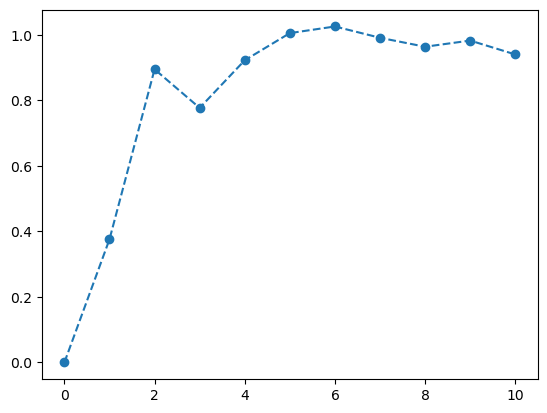

In [43]:
energy_variation = [ i.get_potential_energy() for i in images]
energy_variation = np.array(energy_variation)
energy_variation -= energy_variation.min()

plt.plot(energy_variation, "o--")